In [1]:
from optimpv import *
from optimpv.axBOtorch.axUtils import *
import pandas as pd
import numpy as np
from scipy import interpolate
import warnings

import numpy as np
import torch
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import init_notebook_plotting, render

# import logging

# from ray import train, tune
# from ray.tune.schedulers import AsyncHyperBandScheduler
# from ray.tune.search.ax import AxSearch


init_notebook_plotting()

# Suppress FutureWarning messages
# warnings.simplefilter(action='ignore', category=FutureWarning)
# ##part of the message is also okay
warnings.filterwarnings('ignore') 

mun = FitParam(name = 'l2.mu_n', value = 3e-5, bounds = [1e-5,1e-3], values = None, start_value = None, log_scale = True, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$\mu_n$', unit='m$^2$ V$^{-1}$s$^{-1}$', axis_type = 'log', std = 0,encoding = None,force_log = False)

mup = FitParam(name = 'l2.mu_p', value = 8e-4, bounds = [1e-5,1e-3], values = None, start_value = None, log_scale = True, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$\mu_p$', unit='m$^2$ V$^{-1}$s$^{-1}$', axis_type = 'log', std = 0,encoding = None,force_log = False)

bulk_tr = FitParam(name = 'l2.N_t_bulk', value = 4e20, bounds = [1e19,1e21], values = None, start_value = None, log_scale = True, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$N_{T}$', unit='s', axis_type = 'log', std = 0,encoding = None,force_log = False)

# W_L = FitParam(name = 'W_L', value = 4.05, bounds = [3.92,4.1], values = None, start_value = None, log_scale = False, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$W_L$', unit='eV', axis_type = 'linear', std = 0,encoding = None,force_log = False)

# C_np_bulk = FitParam(name = 'l2.C_np_bulk', value = 1e-13, bounds = [1e-14,1e-12], values = None, start_value = None, log_scale = True, value_type = 'float', fscale = None, rescale = True, stepsize = None, display_name=r'$C_{np}$', unit='m$^{-3}$', axis_type = 'log', std = 0,encoding = None,force_log = False)

offset_l2_l1 = FitParam(name = 'offset_l2_l1.E_c', value = -0.1, bounds = [-0.2,0.0], values = None, start_value = None, log_scale = False, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$\Delta E_{L2-L1}$', unit='eV', axis_type = 'linear', std = 0,encoding = None,force_log = False)

# offset_l3_l2 = FitParam(name = 'offset_l3_l2.E_c', value = -1.65, bounds = [-2,0], values = None, start_value = None, log_scale = False, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$\Delta E_{L3-L2}$', unit='eV', axis_type = 'linear', std = 0,encoding = None,force_log = False)

offset_l2_l3 = FitParam(name = 'offset_l2_l3.E_v', value = 0.1, bounds = [0,0.3], values = None, start_value = None, log_scale = False, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$\Delta E_{L2-L3}$', unit='eV', axis_type = 'linear', std = 0,encoding = None,force_log = False)

Egap_l1 = FitParam(name = 'Egap_l1.E_v', value = 1.6, bounds = [1.55,1.65], type='fixed', values = None, start_value = None, log_scale = False, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$E_{gap,L1}$', unit='eV', axis_type = 'linear', std = 0,encoding = None,force_log = False)

offset_W_L = FitParam(name = 'offset_W_L.E_c', value = -0.1, bounds = [-0.2,0], type='fixed', values = None, start_value = None, log_scale = False, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$\Delta W_L$', unit='eV', axis_type = 'linear', std = 0,encoding = None,force_log = False)

eps_r = FitParam(name = 'l2.eps_r', value = 24, bounds = [15,60], type='fixed', values = None, start_value = None, log_scale = False, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$\epsilon_r$', unit='', axis_type = 'linear', std = 0,encoding = None,force_log = False)

Nions = FitParam(name = 'l2.N_ions', value = 1e22, bounds = [1e20,5e22], type='range', values = None, start_value = None, log_scale = True, value_type = 'float', fscale = None, rescale = False, stepsize = None, display_name=r'$C_{ions}$', unit='m$^{-3}$', axis_type = 'log', std = 0,encoding = None,force_log = False)

params = [mun, mup, bulk_tr, offset_l2_l1, offset_l2_l3, Egap_l1, offset_W_L, eps_r, Nions]

# ({'l2.mu_n': 0.001, 'l2.mu_p': 1e-05, 'l2.N_t_bulk': 1.7603940470752775e+20, 'l2.C_np_bulk': 2.737249616717965, 'offset_l2_l1.E_c': -0.07161177367482424, 'offset_l2_l3.E_v': 0.18380439095587323, 'Egap_l1.E_v': 1.6, 'offset_W_L.E_c': -0.1}, ({'rmsre': np.float64(-0.22903756081756554)}, {'rmsre': {'rmsre': np.float64(0.0016075557479600649)}}))


[INFO 11-19 15:58:39] ax.utils.notebook.plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.
[INFO 11-19 15:58:39] ax.utils.notebook.plotting: Please see
    (https://ax.dev/tutorials/visualizations.html#Fix-for-plots-that-are-not-rendering)
    if visualizations are not rendering.


[{'par': 'l2.mu_n', 'val': '3e-05'}, {'par': 'l2.mu_p', 'val': '0.0008'}, {'par': 'l2.N_t_bulk', 'val': '4e+20'}, {'par': 'l1.E_c', 'val': '4.0'}, {'par': 'l3.E_v', 'val': '5.430000000000001'}, {'par': 'l1.E_v', 'val': '5.6'}, {'par': 'W_L', 'val': '4.1'}, {'par': 'l2.eps_r', 'val': '24'}, {'par': 'l2.N_cation', 'val': '1e+22'}, {'par': 'l2.N_anion', 'val': '1e+22'}]
0
Success


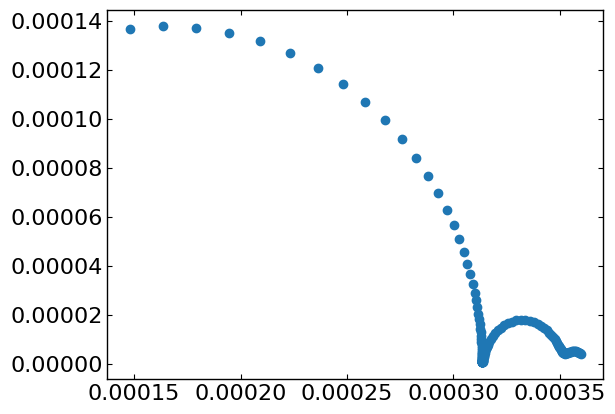

In [ ]:
import pySIMsalabim as sim
from pySIMsalabim.experiments.JV_steady_state import *
from pySIMsalabim.experiments.impedance import *

session_path_simss = os.path.join('/home/lecorre/Desktop/pySIMsalabim/', 'SIMsalabim','SimSS')
simss_device_parameters = os.path.join(session_path_simss, 'simulation_setup.txt')
session_path_zimt = os.path.join('/home/lecorre/Desktop/pySIMsalabim/', 'SIMsalabim','ZimT')
zimt_device_parameters = os.path.join(session_path_zimt, 'simulation_setup.txt')

# Set the JV parameters
f_min = 1e-1
f_max = 1e6
f_steps = 20
V_0 = 1.1
del_V = 0.01
G_frac = 1
# Gfracs = None
UUID = str(uuid.uuid4())

cmd_pars = []
for param in params:
    if param.name != 'l2.C_np_bulk' and param.name != 'offset_l2_l1.E_c' and param.name != 'offset_l2_l3.E_v' and param.name != 'Egap_l1.E_v' and param.name != 'offset_W_L.E_c' and param.name != 'l2.N_ions':
        cmd_pars.append({'par':param.name, 'val':str(param.value)})
    elif param.name == 'offset_l2_l1.E_c':
        cmd_pars.append({'par':'l1.E_c', 'val':str(3.9-param.value)})
        vv = 3.9-param.value
    elif param.name == 'l2.N_ions':
        cmd_pars.append({'par':'l2.N_cation', 'val':str(param.value)})
        cmd_pars.append({'par':'l2.N_anion', 'val':str(param.value)})
    elif param.name == 'l2.C_np_bulk':
        cmd_pars.append({'par':'l2.C_n_bulk', 'val':str(param.value)})
        cmd_pars.append({'par':'l2.C_p_bulk', 'val':str(param.value)})

    elif param.name == 'offset_l2_l3.E_v':
        cmd_pars.append({'par':'l3.E_v', 'val':str(5.53-param.value)})
    
    elif param.name == 'Egap_l1.E_v':
        cmd_pars.append({'par':'l1.E_v', 'val': str(vv+param.value)})
    
    elif param.name == 'offset_W_L.E_c':
        cmd_pars.append({'par':'W_L', 'val':str(vv-param.value)})


print(cmd_pars)

# Run the JV simulation
ret,mess = run_impedance_simu(zimt_device_parameters, session_path_zimt, f_min = f_min, f_max = f_max, f_steps = f_steps, V_0 = V_0, G_frac = G_frac, del_V = del_V, UUID=UUID, cmd_pars=cmd_pars, output_file = 'freqZ.dat')

print(ret)
print(mess)
# save data for fitting
X,y = [],[]

# Load the data
data = pd.read_csv(os.path.join(session_path_zimt, 'freqZ_'+UUID+'.dat'), sep=r'\s+')

# Extract the data
X_imp = np.asarray(data['ReZ'].values)
y_imp = np.asarray(data['ImZ'].values)
freqs = np.asarray(data['freq'].values)

# Bode 
X_imp = np.asarray(data['freq'].values)

yimp = np.asarray(data['ReZ'].values)
yimp2 = np.asarray(data['ImZ'].values)
# put ReZ and ImZ in the same array and double the length of Xfit
X_imp = np.concatenate((freqs,freqs))
#concatenate ReZ and ImZ
y_imp = np.abs(np.concatenate((yimp,yimp2)))


plt.figure()

# plt.plot(X_imp, -y_imp, 'o', label='data')
plt.plot(np.asarray(data['ReZ'].values), -np.asarray(data['ImZ'].values), 'o', label='data')
# plt.xscale('log')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('C [nF/cm$^2$]')
plt.show()


(153, 2)
(153,)


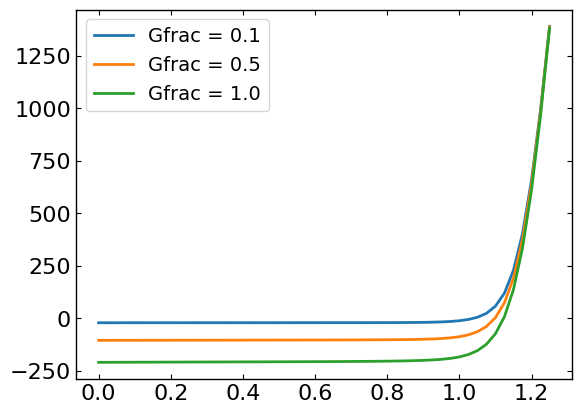

In [3]:
# Run the JV simulation
Gfracs = [0.1,0.5,1.0] # Fractions of the generation rate to simulate
# Gfracs = None
ret, mess = run_SS_JV(simss_device_parameters, session_path_simss, JV_file_name = 'JV.dat', varFile= 'Var.dat',G_fracs = Gfracs, parallel = True, max_jobs = 3, UUID=UUID, cmd_pars=cmd_pars)

# save data for fitting
X,y = [],[]
if Gfracs is None:
    data = pd.read_csv(os.path.join(session_path, 'JV_'+UUID+'.dat'), sep=r'\s+') # Load the data
    Vext = np.asarray(data['Vext'].values)
    Jext = np.asarray(data['Jext'].values)
    G = np.ones_like(Vext)

    X= Vext
    y = Jext

    plt.figure()
    plt.plot(X,y)
    plt.show()
else:
    for Gfrac in Gfracs:
        data = pd.read_csv(os.path.join(session_path_simss, 'JV_Gfrac_'+str(Gfrac)+'_'+UUID+'.dat'), sep=r'\s+') # Load the data
        Vext = np.asarray(data['Vext'].values)
        Jext = np.asarray(data['Jext'].values)
        G = np.ones_like(Vext)*Gfrac

        if len(X) == 0:
            X = np.vstack((Vext,G)).T
            y = Jext
        else:
            X = np.vstack((X,np.vstack((Vext,G)).T))
            y = np.hstack((y,Jext))

    print(X.shape)
    print(y.shape)


    plt.figure()
    for Gfrac in Gfracs:
        plt.plot(X[X[:,1]==Gfrac,0],y[X[:,1]==Gfrac],label='Gfrac = '+str(Gfrac))
    plt.legend()
    plt.show()



In [4]:
from optimpv.DDfits.JVAgent import JVAgent
from optimpv.DDfits.ImpedanceAgent import ImpedanceAgent
# metric = 'rmsre'
metric = 'rmsre'
loss = 'log10'
# loss = 'linear'

imp = ImpedanceAgent(params, X_imp, y_imp, session_path_zimt, metric = metric, loss = loss, f_min = f_min, f_max = f_max, f_steps = f_steps, V_0 = V_0, G_frac = G_frac, del_V = del_V, simulation_setup=zimt_device_parameters, impedance_format = 'Bode',freqs = freqs)

metric = 'rmsre'
# metric = 'mse'
loss = 'log10'
# loss = 'linear'

jv = JVAgent(params, X, y, session_path_simss, simss_device_parameters,parallel = True, max_jobs = 3, metric = metric, loss = loss)

{'rmsre': np.float64(-1.4075446864114327)}


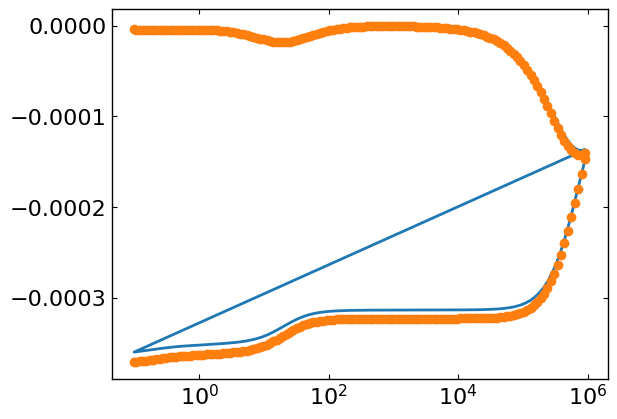

In [5]:
dum_dic = {}
for param in params:
    dum_dic[param.name] = param.value*1.001

yimp_fit = imp.run(parameters=dum_dic)
print(imp.run_Ax(parameters=dum_dic))
plt.figure()
plt.plot(X_imp,-y_imp)
plt.plot(X_imp,-yimp_fit,'o')
plt.xscale('log')



In [6]:
from optimpv.axBOtorch.axBOtorchOptimizer import axBOtorchOptimizer
from botorch.acquisition.logei import (
    qLogExpectedImprovement,
    qLogNoisyExpectedImprovement,
    
)
# import qLogExpectedHypervolumeImprovement
from botorch.acquisition.multi_objective.logei import qLogExpectedHypervolumeImprovement
from ax.modelbridge.transforms.standardize_y import StandardizeY
from ax.modelbridge.transforms.unit_x import UnitX
from ax.modelbridge.transforms.remove_fixed import RemoveFixed
from ax.modelbridge.transforms.log import Log
from ax.models.torch.botorch_modular.surrogate import Surrogate
# multitaskGP
# from ax.models.torch.botorch_modular.multitask import MultiTaskGP
from botorch.models import KroneckerMultiTaskGP
from botorch.models.multitask import MultiTaskGP
# model_kwargs_list = [{'torch_device': torch.device("cuda" if torch.cuda.is_available() else "cpu"),'torch_dtype': torch.double},{'torch_device': torch.device("cuda" if torch.cuda.is_available() else "cpu"),'torch_dtype': torch.double,'botorch_acqf_class':qLogNoisyExpectedImprovement,'transforms':[RemoveFixed, Log,UnitX, StandardizeY]},{'torch_device': torch.device("cuda" if torch.cuda.is_available() else "cpu"),'torch_dtype': torch.double},{'torch_device': torch.device("cuda" if torch.cuda.is_available() else "cpu"),'torch_dtype': torch.double,'botorch_acqf_class':qLogNoisyExpectedImprovement,'transforms':[RemoveFixed, Log,UnitX, StandardizeY]}]

model_kwargs_list = [{},{'torch_device': torch.device("cuda" if torch.cuda.is_available() else "cpu"),'torch_dtype': torch.double,'botorch_acqf_class':qLogExpectedHypervolumeImprovement,'transforms':[RemoveFixed, Log,UnitX, StandardizeY]}]#,'surrogate':Surrogate(MultiTaskGP)}]



optimizer = axBOtorchOptimizer(params = params, agents = [jv, imp], models = ['SOBOL','BOTORCH_MODULAR'],n_batches = [1,40], batch_size = [5,4], metrics = [metric,metric], minimize_list = True, thresholds = [[-0.8],[-0.1]], ax_client = None,  max_parallelism = 20,model_kwargs_list = model_kwargs_list, model_gen_kwargs_list = None, name = 'ax_opti')


In [7]:
print( torch.device("cuda" if torch.cuda.is_available() else "cpu"))

cuda


In [8]:
optimizer.optimize()

[INFO 11-19 15:59:35] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 11-19 15:59:35] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='l2.mu_n', parameter_type=FLOAT, range=[1e-05, 0.001], log_scale=True), RangeParameter(name='l2.mu_p', parameter_type=FLOAT, range=[1e-05, 0.001], log_scale=True), RangeParameter(name='l2.N_t_bulk', parameter_type=FLOAT, range=[1e+19, 1e+21], log_scale=True), RangeParameter(name='offset_l2_l1.E_c', parameter_type=FLOAT, range=[-0.2, 0.0]), RangeParameter(name='offset_l2_l3.E_v', parameter_type=FLOAT, range=[0.0, 0.3]), FixedParameter(name='Egap_l1.E_v', parameter_type=FLOAT, value=1.6), FixedParameter(name='offset_W_L.E_c', parameter_type=FLOAT, value=-0.1), FixedParameter(name='l2.eps_r', parameter_type=FLOAT, value=24.0), RangeParameter(name='l2.N

OrderedDict({141: ({'l2.mu_n': 0.00029034342235215746, 'l2.mu_p': 0.0009365479426541285, 'l2.N_t_bulk': 3.7731642955090815e+20, 'offset_l2_l1.E_c': -0.04763778399734317, 'offset_l2_l3.E_v': 0.0986140255716978, 'l2.N_ions': 8.304430069262337e+21, 'Egap_l1.E_v': 1.6, 'offset_W_L.E_c': -0.1, 'l2.eps_r': 24.0}, ({'0_rmsre': np.float64(-1.4616369435744367), '1_rmsre': np.float64(-1.4374439436769932)}, {'0_rmsre': {'0_rmsre': nan, '1_rmsre': 0.0}, '1_rmsre': {'0_rmsre': 0.0, '1_rmsre': nan}})), 145: ({'l2.mu_n': 0.00023179731334538502, 'l2.mu_p': 0.0009348418055016385, 'l2.N_t_bulk': 3.636171885620562e+20, 'offset_l2_l1.E_c': -0.04271298072863436, 'offset_l2_l3.E_v': 0.10031146715729257, 'l2.N_ions': 7.67082811185905e+21, 'Egap_l1.E_v': 1.6, 'offset_W_L.E_c': -0.1, 'l2.eps_r': 24.0}, ({'0_rmsre': np.float64(-1.4706651379427338), '1_rmsre': np.float64(-1.3296775704329982)}, {'0_rmsre': {'0_rmsre': nan, '1_rmsre': 0.0}, '1_rmsre': {'0_rmsre': 0.0, '1_rmsre': nan}})), 149: ({'l2.mu_n': 0.000300

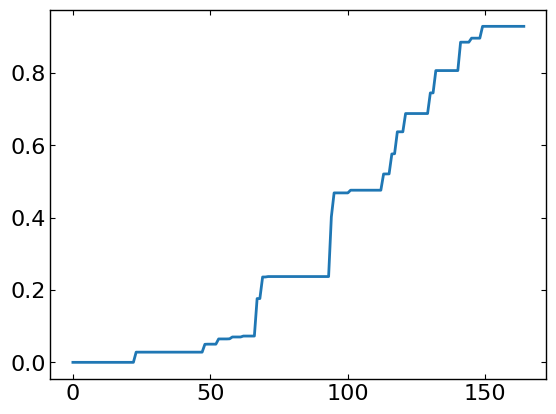

In [9]:
ax_client = optimizer.ax_client
pareto = ax_client.get_pareto_optimal_parameters(use_model_predictions=False)
best_keys = list(pareto.keys())
print(pareto)
plt.figure()
plt.plot(ax_client.get_trace())

#find max in get_trace
max_val = np.max(ax_client.get_trace())
index_max = np.argmax(ax_client.get_trace())
index_max = best_keys[0]
best_parameters = pareto[index_max][0]

imp.params_w(best_parameters,imp.params)
print(imp.get_SIMsalabim_clean_cmd(imp.params))
imp.package_SIMsalabim_files(imp.params,'zimt')

In [10]:
# plot the evolution of the optimization
render(ax_client.get_contour_plot(param_x="l2.mu_n", param_y="l2.mu_p", metric_name=optimizer.all_metrics[0]))
# render(ax_client.get_contour_plot(param_x="l2.N_t_bulk", param_y="l2.C_np_bulk", metric_name=metric))
from ax.plot.slice import plot_slice
model = ax_client.generation_strategy.model

render(plot_slice(model=model, param_name="l2.mu_n", metric_name=optimizer.all_metrics[0]))
render(plot_slice(model=model, param_name="l2.mu_p", metric_name=optimizer.all_metrics[0]))
render(plot_slice(model=model, param_name="l2.N_t_bulk", metric_name=optimizer.all_metrics[0]))
# render(plot_slice(model=model, param_name="l2.C_np_bulk", metric_name=metric))



[INFO 11-19 16:54:17] ax.service.ax_client: Retrieving contour plot with parameter 'l2.mu_n' on X-axis and 'l2.mu_p' on Y-axis, for metric '0_rmsre'. Remaining parameters are affixed to the middle of their range.


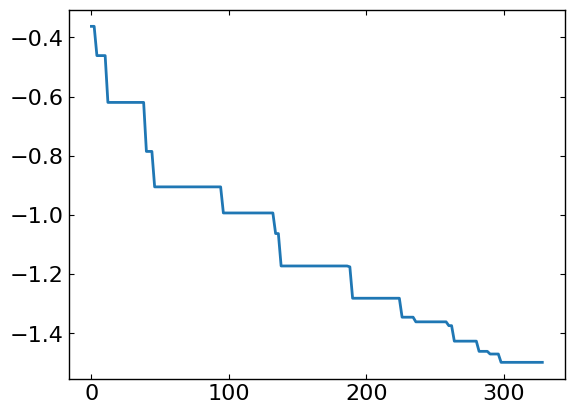

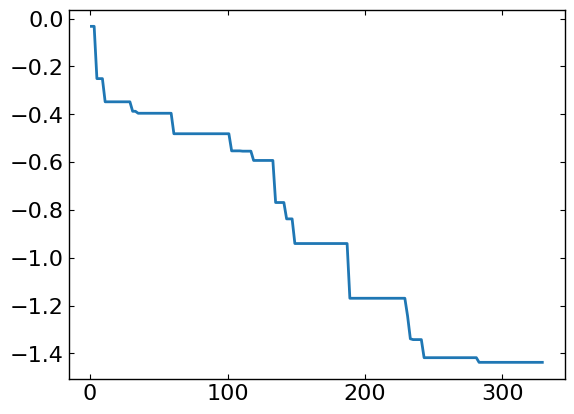

In [11]:
data = ax_client.experiment.fetch_data()
# split df by metric name 
data = data.df
metric1_df = data[data["metric_name"] == optimizer.all_metrics[0]]
metric2_df = data[data["metric_name"] == optimizer.all_metrics[1]]

# plt.figure()
# plt.plot(np.minimum.accumulate(data.df["mean"]), label="Best value seen so far")

plt.figure()
plt.plot(np.minimum.accumulate(metric1_df["mean"]), label="Best value seen so far")

plt.figure()
plt.plot(np.minimum.accumulate(metric2_df["mean"]), label="Best value seen so far")

# plt.yscale("log")


In [12]:
# create dic with keys same as ax_client.experiment.trials[0].arm.parameters
dumdic = {}
for key in ax_client.experiment.trials[0].arm.parameters.keys():
    dumdic[key] = []
from ax.core.base_trial import TrialStatus as T
# fill the dic with the values of the parameters
for i in range(len(ax_client.experiment.trials)):
    if ax_client.experiment.trials[i].status == T.COMPLETED:
        for key in ax_client.experiment.trials[i].arm.parameters.keys():
            dumdic[key].append(ax_client.experiment.trials[i].arm.parameters[key])


data = ax_client.experiment.fetch_data().df

target1 = data[data['metric_name'] == optimizer.all_metrics[0]]['mean']

dumdic[optimizer.all_metrics[0]] = list(target1)

target2 = data[data['metric_name'] == optimizer.all_metrics[1]]['mean']

dumdic[optimizer.all_metrics[1]] = list(target2)

dumdic['iteration'] = list(data[data['metric_name'] == optimizer.all_metrics[0]]['trial_index'])

df = pd.DataFrame(dumdic)
# # df = df.sort_values(by='mse')


141


Text(0, 0.5, '1_rmsre')

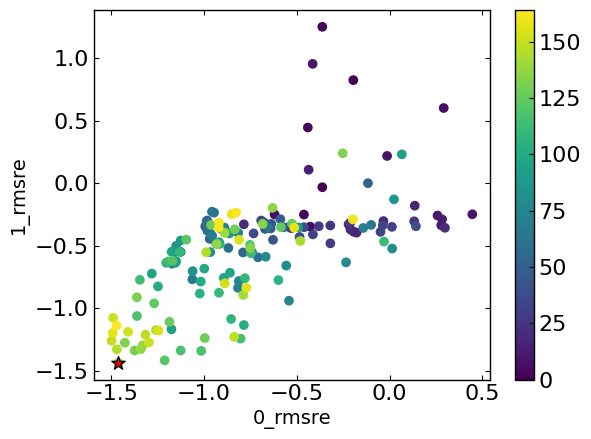

In [13]:
plt.figure()
# color by iteration
# plt.plot(df['rmsre'],df['mse'],c=df['iteration'],marker='o',linestyle='None')
plt.scatter(df[optimizer.all_metrics[0]],df[optimizer.all_metrics[1]],c=df['iteration'],marker='o',linestyle='None')
plt.colorbar()
# plot best_keys with a star
# plt.scatter(df[optimizer.all_metrics[0]][best_keys],df[optimizer.all_metrics[1]][best_keys],c=df['iteration'][best_keys],marker='o',linestyle='None',s=100,edgecolors='k')
plt.scatter(df[optimizer.all_metrics[0]][index_max],df[optimizer.all_metrics[1]][index_max],c='r',marker='*',s=100,edgecolors='k')
print(index_max)
plt.xlabel(optimizer.all_metrics[0])
plt.ylabel(optimizer.all_metrics[1])


<Figure size 640x480 with 0 Axes>

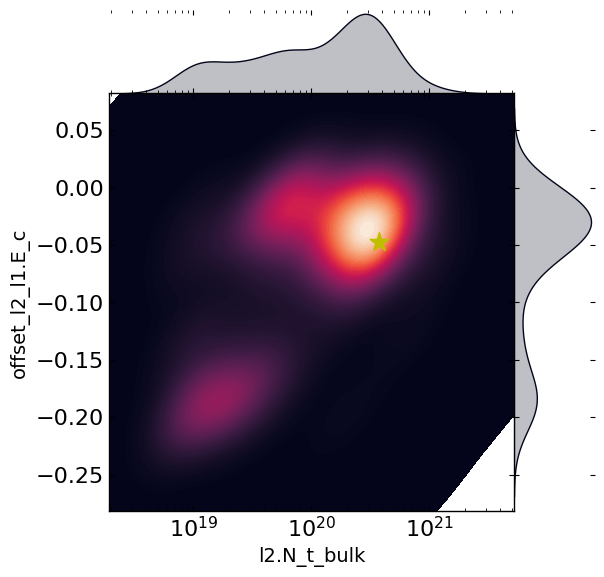

In [14]:
import seaborn as sns
plt.figure()

xx = 'l2.N_t_bulk'
yy = 'offset_l2_l1.E_c'
kind = 'kde'
if kind == 'scatter':
    g = sns.jointplot(x=xx,y=yy,data=df,kind=kind, cmap="rocket",color="#03051A",space=0, marginal_ticks=False)
    plt.xscale('log')
    plt.yscale('log')
else:
    g = sns.jointplot(x=xx,y=yy,data=df,kind=kind,fill=True, thresh=0, levels = 100, cmap="rocket",color="#03051A",space=0, marginal_ticks=False,log_scale=(True,False))
# plt.scatter(3e-5,8e-4,c='r')
plt.scatter(best_parameters[xx],best_parameters[yy],c='y',marker='*',s=200)


plt.show()

<Figure size 640x480 with 0 Axes>

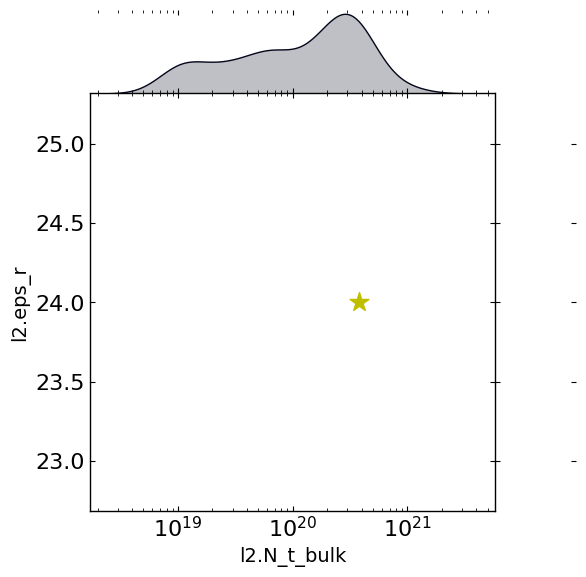

In [15]:
plt.figure()

xx = 'l2.N_t_bulk'
yy = 'l2.eps_r'
kind = 'kde'
if kind == 'scatter':
    g = sns.jointplot(x=xx,y=yy,data=df,kind=kind, cmap="rocket",color="#03051A",space=0, marginal_ticks=False)
    plt.xscale('log')
    plt.yscale('log')
else:
    g = sns.jointplot(x=xx,y=yy,data=df,kind=kind,fill=True, thresh=0, levels = 100, cmap="rocket",color="#03051A",space=0, marginal_ticks=False,log_scale=(True,False))
# plt.scatter(3e-5,8e-4,c='r')
plt.scatter(best_parameters[xx],best_parameters[yy],c='y',marker='*',s=200)


plt.show()

<Figure size 640x480 with 0 Axes>

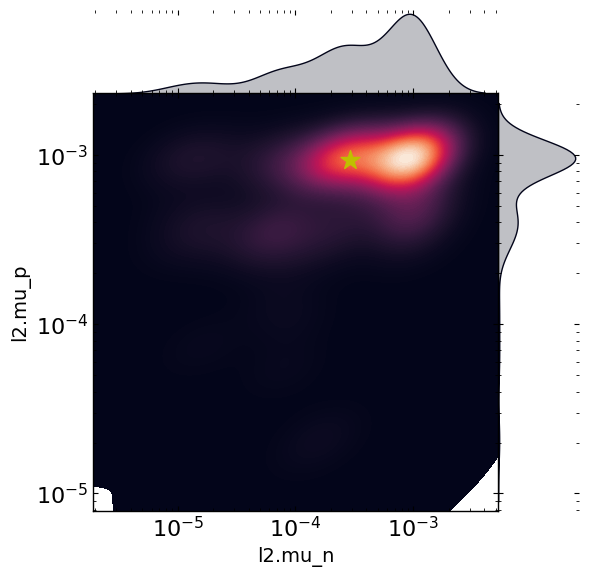

In [16]:
plt.figure()

xx = 'l2.mu_n'
yy = 'l2.mu_p'
kind = 'kde'
if kind == 'scatter':
    g = sns.jointplot(x=xx,y=yy,data=df,kind=kind, cmap="rocket",color="#03051A",space=0, marginal_ticks=False)
    plt.xscale('log')
    plt.yscale('log')
else:
    g = sns.jointplot(x=xx,y=yy,data=df,kind=kind,fill=True, thresh=0, levels = 100, cmap="rocket",color="#03051A",space=0, marginal_ticks=False,log_scale=(True,True))
# plt.scatter(3e-5,8e-4,c='r')
plt.scatter(best_parameters[xx],best_parameters[yy],c='y',marker='*',s=200)


plt.show()

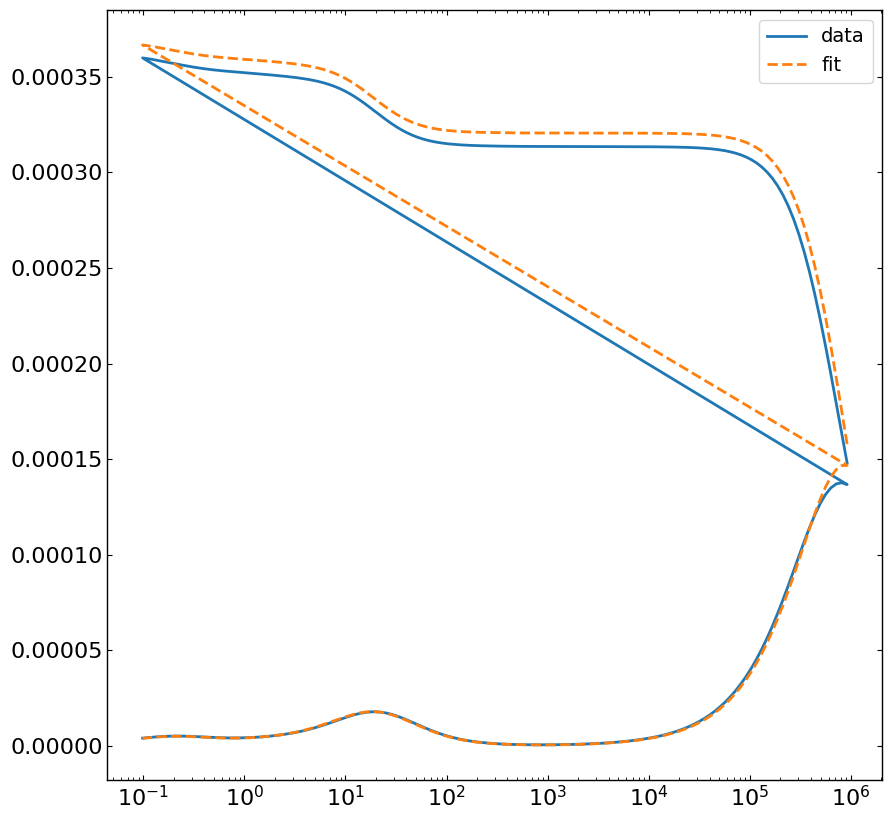

In [17]:
# rerun the simulation with the best parameters
yfit = imp.run(parameters=best_parameters)
# print(jv.run_Ax(parameters=results.get_best_result(metric=metric,mode='min',filter_nan_and_inf=True).config))
plt.figure(figsize=(10,10))
plt.plot(X_imp,y_imp,label='data')
plt.plot(X_imp,yfit,label='fit',linestyle='--')
# plt.ylim([0,5e-4])
plt.xscale('log')
plt.legend()
plt.show()

272
272
272


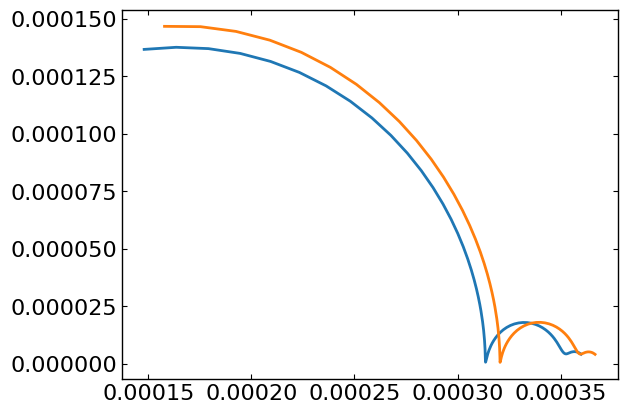

In [18]:
# plto the two halfs of the data X_imp and y_imp
print(len(X_imp))
print(len(y_imp))
print(len(yfit))
plt.figure()
plt.plot(y_imp[:len(y_imp)//2],y_imp[len(y_imp)//2:],label='data')
plt.plot(yfit[:len(yfit)//2],yfit[len(yfit)//2:],label='fit')
# plt.plot(X_imp[len(X_imp)//2:],y_imp[len(X_imp)//2:],label='data')


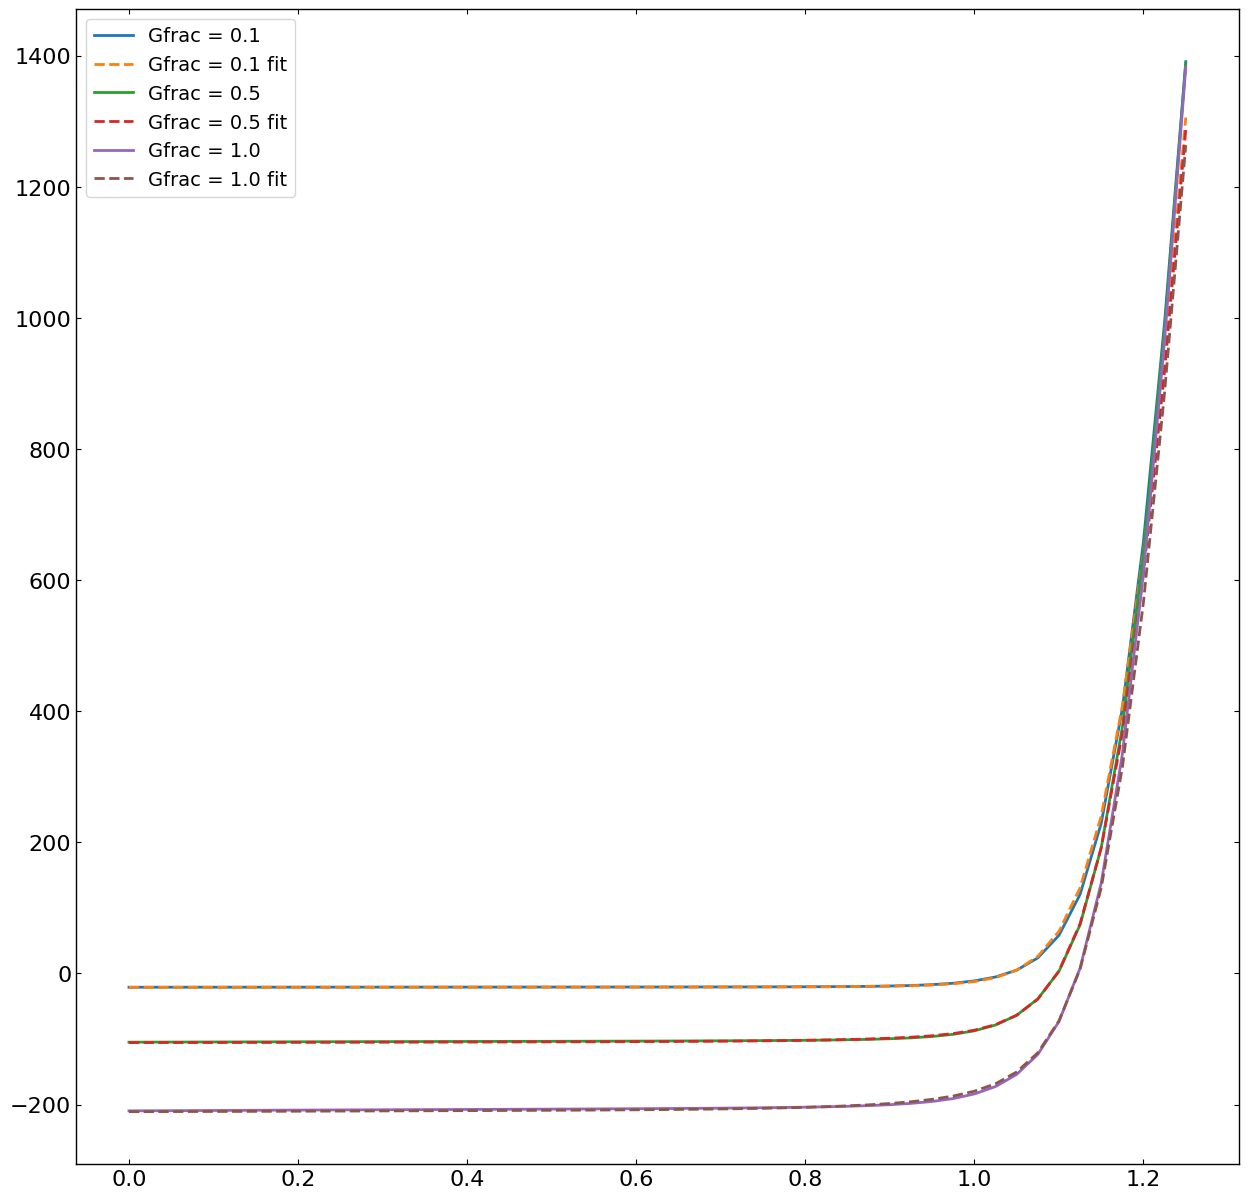

In [19]:
# rerun the simulation with the best parameters
yfit = jv.run(parameters=best_parameters)
# print(jv.run_Ax(parameters=results.get_best_result(metric=metric,mode='min',filter_nan_and_inf=True).config))
plt.figure(figsize=(15,15))
for Gfrac in Gfracs:
    plt.plot(X[X[:,1]==Gfrac,0],y[X[:,1]==Gfrac],label='Gfrac = '+str(Gfrac))
    plt.plot(X[X[:,1]==Gfrac,0],yfit[X[:,1]==Gfrac],label='Gfrac = '+str(Gfrac)+' fit',linestyle='--')
plt.legend()
plt.show()

In [20]:
# Clean up the output files (comment out if you want to keep the output files)
sim.clean_all_output(session_path_zimt)
sim.clean_up_output('freqZ',session_path_zimt)
sim.delete_folders('tmp',session_path_zimt)
sim.clean_all_output(session_path_simss)
sim.delete_folders('tmp',session_path_simss)